In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [3]:
def createBox(img, points):
    bbox = cv2.boundingRect(points)
    x, y, w, h = bbox
    imgCrop = img[y:y+h, x:x+w]
    imgCrop = cv2.resize(imgCrop, (200, 200))
    return imgCrop

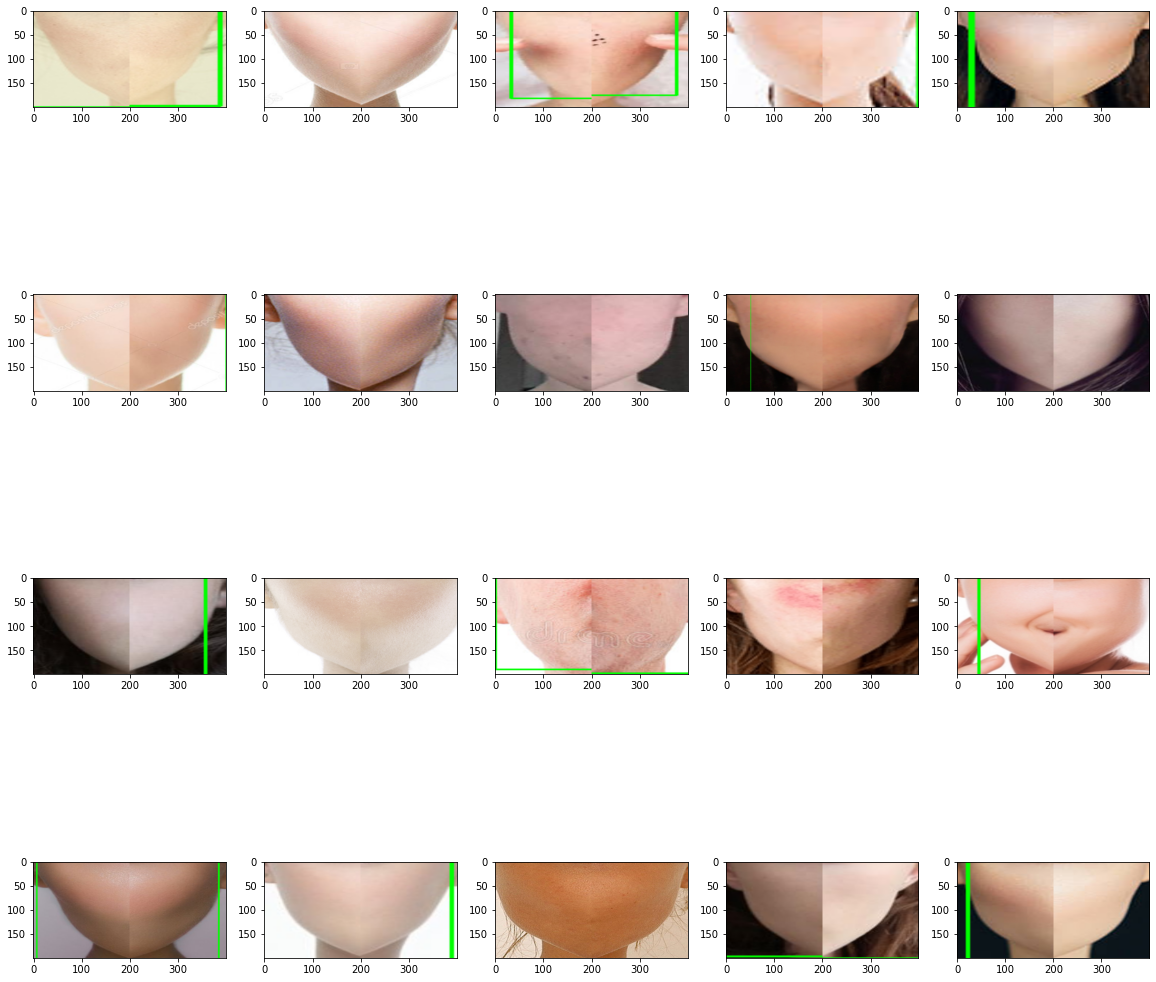

In [4]:
m = 1
columns = 5
rows = 4
directory = 'image-test'

fig = plt.figure(figsize=(20, 20))
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgOriginal = img.copy()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(imgGray)
    
    for face in faces:
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()
        imgOriginal = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        landmarks = predictor(imgGray, face)
        myPoints = []
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            myPoints.append([x, y])
        
    myPoints = np.array(myPoints)
    img_cheek_right = createBox(img, myPoints[1:7])
    img_cheek_left = createBox(img, myPoints[10:16])
    img_cheek = np.concatenate((img_cheek_right, img_cheek_left), axis=1)     
    
    saveDir = 'image-test-cropped/test-model-2/'
    cv2.imwrite(saveDir + 'tc-2-' + str(m) + '.jpg', cv2.cvtColor(img_cheek, cv2.COLOR_RGB2BGR))

    fig.add_subplot(rows, columns, m)
    plt.imshow(img_cheek)
    m += 1

